In [1]:
!pip install qiskit 
from IPython.display import clear_output
clear_output()

In [2]:
from qiskit import QuantumCircuit
import numpy as np

def my_qft(N,inverse):
    pi = np.pi
    
    if inverse == True:
        qft_circuit = QuantumCircuit(N,name = "IQFT")
    else:
        qft_circuit = QuantumCircuit(N,name = "QFT")
        
    for q in range(N):
        qft_circuit.h(q)
        for p in range(N):
            if q<p:
                qft_circuit.cu1(2*pi/(2**(p+1)),q,p)
    
    for q in range(N//2):
        qft_circuit.swap(q,N-1-q)
     
    if inverse == True:
        return qft_circuit.inverse()
    else:
        return qft_circuit


qc=QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.x(2)
qc.append(my_qft(3,inverse=False),[0,1,2])
qc.measure([0,1,2],[0,1,2])

In [3]:


from qiskit import IBMQ
IBMQ.save_account(token)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

configrc.store_credentials:WARNING:2020-10-02 18:48:00,415: Credentials already present. Set overwrite=True to overwrite.
/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


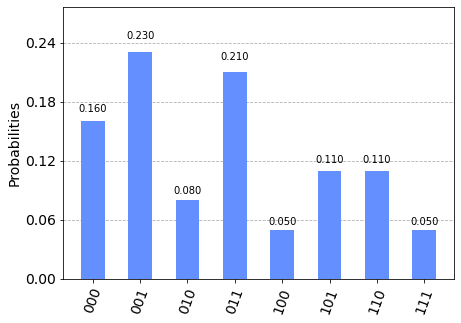

In [4]:
backend = provider.get_backend('ibmq_5_yorktown')

from qiskit import Aer, execute
#simulator = Aer.get_backend('qasm_simulator')
#backend = simulator
counts = execute(qc, backend=backend, shots=100).result().get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


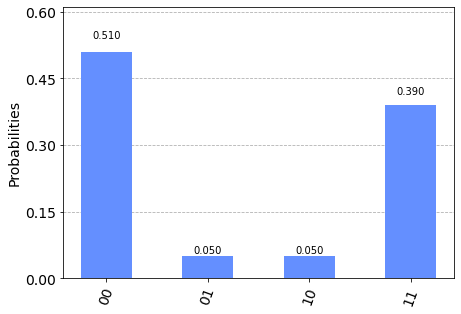

In [8]:
#Constructs the circuit to prepare the GHZ state on N qubits from an intial state of all \ket{0} 
def prepare_GHZ_state(N):
  GHZ_circuit = QuantumCircuit(N,name='Prepare GHZ')
  GHZ_circuit.h(0)
  for i in range(N-1):
    GHZ_circuit.cx(i,i+1)

  print(GHZ_circuit.draw(output='text'))
  return GHZ_circuit

N=2
#Note that N=2 produces a bell state
ghz_test = QuantumCircuit(N,N)
ghz_test.append(prepare_GHZ_state(N),range(N))
ghz_test.measure(range(N),range(N))
ghz_test.draw(output='text')
backend = provider.get_backend('ibmq_5_yorktown')

from qiskit import Aer, execute
#simulator = Aer.get_backend('qasm_simulator')
#backend=simulator
shots=100
counts = execute(ghz_test, backend=backend, shots=shots).result().get_counts(ghz_test)
from qiskit.visualization import plot_histogram
plot_histogram(counts)



Let $\big| \psi \rangle$ be a pure state in some hilbert space $\mathbb{X}\otimes\mathbb{Y}$ with Schmidt decomposition $$\big| \psi \rangle = \displaystyle\sum_i\sqrt{\lambda_i} \big|x_i\rangle_{\mathbb{X}}\otimes\big| y_i\rangle_{\mathbb{Y}}$$ then the entropy of entanglement of $\big| \psi\rangle$ is defined by $$\text{S}(\psi) = -\displaystyle\sum_i \lambda_i\log{\lambda_i} $$
and the entanglement number of $\big| \psi\rangle$ is defined by 
$$e(\psi)=\big( 1- \displaystyle\sum_i\lambda_i^2\big)^\frac{1}{2}  $$  
Both of these functions are examples of bipartite entanglement measures. Let's see how their values compare on the Bell states. 

In [9]:
counts

{'00': 51, '01': 5, '10': 5, '11': 39}

In [17]:
import numpy.linalg as la 
#Note that if the c_ij are off by a phase shift on the ij component, the schmidt coefficients will be the same.
#The resulting vectors in the schmidt decomposition may however be different. 
c_ij = [np.sqrt((counts.get(frequency)/shots)) for frequency in counts]

M = np.matrix([[c_ij[0],c_ij[1]],
               [c_ij[2],c_ij[3]]
              ])
schmidt_coefficients = la.svd(M)[1]

entropy_of_entanglement = 0
entanglement_number=0
for s in schmidt_coefficients:
  entropy_of_entanglement += (-1)*(s*s)*np.log(s*s)
  entanglement_number+=s**4

entanglement_number=np.sqrt(1-entanglement_number)

In [25]:
print('The measured entropy of entanglement of the Bell state is ', entropy_of_entanglement, '.')
print('The measured entanglement number of the Bell state is ', entanglement_number, '.')

The measured entropy of entanglement of the Bell state is  0.4929896734344239 .
The measured entanglement number of the Bell state is  0.5600032031302045 .


In [19]:
s = np.sqrt(2)/2
entanglement_number_actual = np.sqrt(1-2*(s**4))
entropy_of_entanglement_actual = -2*s*s*np.log(s*s)

In [22]:
number_error = (entanglement_number_actual-entanglement_number)/entanglement_number_actual
entropy_error = (entropy_of_entanglement_actual-entropy_of_entanglement)/entropy_of_entanglement_actual

In [24]:
print('The percent error of the experimental computation of the entropy of entanglement of the Bell state is ', entropy_error, '.')
print('The percent error of the experimental computation of the entanglement number of the Bell state is ', number_error ,'.')

The percent error of the experimental computation of the entropy of entanglement of the Bell state is  0.28876624292668696 .
The percent error of the experimental computation of the entanglement number of the Bell state is  0.2080358751608895 .
